In [31]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical


In [101]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(nb_words=10000)

In [107]:
print type(train_data[0]), len(train_data[0])
np.array(train_data[0]).flatten()

<type 'list'> 218


array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
# word_index is a dictionary mapping words to an integer indice
word_index = imdb.get_word_index()
# we reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# we decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    # create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
# our vectorized training data
x_train = vectorize_sequences(train_data)
# our vectorized test data
x_test = vectorize_sequences(test_data)

In [9]:
# our vectorized labels:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=10000))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_x_train, partial_y_train, nb_epoch=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 210s - loss: 0.5037 - acc: 0.7881 - val_loss: 0.3868 - val_acc: 0.8675
Epoch 2/20
15000/15000 [==============================] - 3s - loss: 0.3013 - acc: 0.9053 - val_loss: 0.3272 - val_acc: 0.8737
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.2233 - acc: 0.9257 - val_loss: 0.2769 - val_acc: 0.8939
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.1755 - acc: 0.9455 - val_loss: 0.2729 - val_acc: 0.8922
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.1451 - acc: 0.9545 - val_loss: 0.2802 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.1167 - acc: 0.9651 - val_loss: 0.2974 - val_acc: 0.8858
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 0.1021 - acc: 0.9693 - val_loss: 0.3045 - val_acc: 0.8843
Epoch 8/20
15000/15000 [==============================] - 2

In [17]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

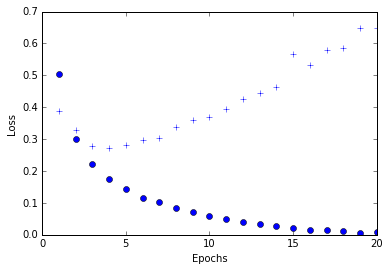

In [18]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

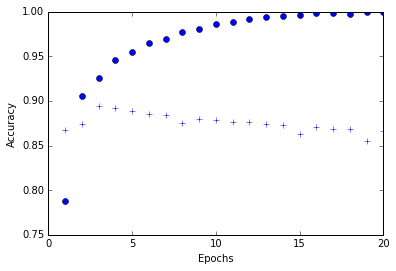

In [19]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [20]:
model = Sequential()

In [21]:
model.add(Dense(16, activation='relu', input_dim=10000))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, nb_epoch=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 8s - loss: 0.4671 - acc: 0.8236     
Epoch 2/4
25000/25000 [==============================] - 3s - loss: 0.2706 - acc: 0.9083     
Epoch 3/4
25000/25000 [==============================] - 3s - loss: 0.2078 - acc: 0.9268     
Epoch 4/4
25000/25000 [==============================] - 115s   


In [22]:
results

[0.29061039520263671, 0.88539999999999996]

In [23]:
model.predict(x_test)

array([[ 0.93360293],
       [ 0.83461744],
       [ 0.9988656 ],
       ..., 
       [ 0.58213502],
       [ 0.00219305],
       [ 0.77095723]], dtype=float32)

In [24]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(nb_words=10000)

In [25]:
len(train_data)

8982

In [26]:
len(test_data)

2246

In [27]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [28]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [29]:
train_labels[10]

3

In [30]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [31]:
# our vectorized training data
x_train = vectorize_sequences(train_data)
# our vectorized test data
x_test = vectorize_sequences(test_data)

In [32]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [33]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10000))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [34]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [36]:
history = model.fit(partial_x_train, partial_y_train, nb_epoch=20, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s - loss: 2.6524 - acc: 0.4726 - val_loss: 1.7200 - val_acc: 0.6380
Epoch 2/20
7982/7982 [==============================] - 1s - loss: 1.4291 - acc: 0.7030 - val_loss: 1.2767 - val_acc: 0.7120
Epoch 3/20
7982/7982 [==============================] - 1s - loss: 1.0557 - acc: 0.7751 - val_loss: 1.1047 - val_acc: 0.7690
Epoch 4/20
7982/7982 [==============================] - 1s - loss: 0.8364 - acc: 0.8206 - val_loss: 1.0090 - val_acc: 0.7700
Epoch 5/20
7982/7982 [==============================] - 1s - loss: 0.6695 - acc: 0.8554 - val_loss: 0.9435 - val_acc: 0.8050
Epoch 6/20
7982/7982 [==============================] - 1s - loss: 0.5347 - acc: 0.8896 - val_loss: 0.9179 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s - loss: 0.4342 - acc: 0.9105 - val_loss: 0.8839 - val_acc: 0.8200
Epoch 8/20
7982/7982 [==============================] - 1s - loss: 0.3512 - a

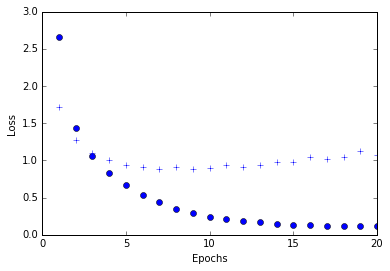

In [37]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

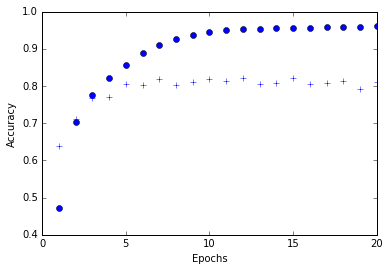

In [38]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [39]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10000))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, one_hot_train_labels, nb_epoch=9, batch_size=512,
          validation_data=(x_test, one_hot_test_labels))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 8982 samples, validate on 2246 samples
Epoch 1/9
8982/8982 [==============================] - 9s - loss: 2.4272 - acc: 0.5480 - val_loss: 1.6240 - val_acc: 0.6679
Epoch 2/9
8982/8982 [==============================] - 2s - loss: 1.3094 - acc: 0.7238 - val_loss: 1.3303 - val_acc: 0.7070
Epoch 3/9
8982/8982 [==============================] - 2s - loss: 0.9920 - acc: 0.7826 - val_loss: 1.1538 - val_acc: 0.7556
Epoch 4/9
8982/8982 [==============================] - 2s - loss: 0.7807 - acc: 0.8371 - val_loss: 1.0508 - val_acc: 0.7711
Epoch 5/9
8982/8982 [==============================] - 2s - loss: 0.6176 - acc: 0.8703 - val_loss: 0.9922 - val_acc: 0.7747
Epoch 6/9
8982/8982 [==============================] - 2s - loss: 0.4915 - acc: 0.8985 - val_loss: 0.9579 - val_acc: 0.7907
Epoch 7/9
8982/8982 [==============================] - 2s - loss: 0.3926 - acc: 0.9162 - val_loss: 0.9592 - val_acc: 0.7867
Epoch 8/9
8982/8982 [==============================] - 2s - loss: 0.3222 - acc: 0.93

In [40]:
results

[0.95542759440991887, 0.79118432769367764]

In [41]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19723953695458593

In [43]:
predictions = model.predict(x_test)

In [44]:
predictions[0].shape

(46,)

In [46]:
np.sum(predictions[0])

0.99999988

In [47]:
np.argmax(predictions[0])

3

In [48]:
predictions[0]

array([  7.23311177e-06,   1.30492917e-04,   1.90090832e-05,
         9.57346201e-01,   3.64323743e-02,   4.25556755e-06,
         1.23564296e-05,   5.84310192e-06,   1.45786756e-03,
         2.75810453e-06,   5.33384300e-05,   1.46941034e-04,
         3.19128303e-05,   3.86889842e-05,   1.86112782e-04,
         3.24078101e-05,   1.41638727e-03,   1.33268972e-04,
         3.90569403e-06,   9.76165640e-04,   1.89765065e-04,
         2.54586746e-04,   1.39069180e-05,   2.41868765e-05,
         4.98469399e-06,   1.86865786e-04,   1.63079505e-07,
         8.43011458e-06,   3.04349851e-06,   4.54893998e-05,
         3.65626365e-05,   7.28990126e-05,   5.96369046e-06,
         2.48961874e-06,   1.62048324e-04,   1.15946923e-05,
         7.18201627e-05,   4.61796699e-05,   8.71376324e-06,
         3.84192041e-04,   8.60423654e-07,   1.62173019e-05,
         2.72695729e-06,   7.28275040e-07,   3.09386735e-07,
         7.69241433e-06], dtype=float32)

In [60]:
# from keras.datasets import boston_housing
# (train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.data.shape

(506, 13)

In [14]:
(train_data, train_targets), (test_data, test_targets) = (boston.data[:406], boston.target[:406]), (boston.data[406:], boston.target[406:])

In [15]:
train_data.shape

(406, 13)

In [16]:
test_data.shape

(100, 13)

In [17]:
train_targets

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [18]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [19]:
test_data -= mean
test_data /= std

In [20]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=train_data.shape[1]))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [21]:
k= 4
num_val_samples = len(train_data) // k 
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    # prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    # build the Keras model (already compiled)
    model = build_model()
    # train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              nb_epoch=100, batch_size=1, verbose=0)
    # evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

('processing fold #', 0)
('processing fold #', 1)
('processing fold #', 2)
('processing fold #', 3)


In [22]:
all_scores

[2.5259972515672739,
 4.5694884286068458,
 3.2700295353880025,
 5.1914312343786255]

In [23]:
np.mean(all_scores)

3.8892366124851874

In [24]:
mean

array([  1.70635263e-16,  -3.22128750e-16,   3.92898631e-15,
         4.09907466e-16,  -7.46748038e-15,  -4.35147266e-15,
        -4.32604144e-16,   7.17543157e-16,   4.98779999e-16,
         9.62557893e-17,   1.87370644e-14,   1.94214513e-14,
         2.89861184e-17])

In [25]:
model.fit(train_data, train_targets,
          nb_epoch=300, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

 32/100 [========>.....................] - ETA: 0s

In [46]:
test_mae_score

7.8187971687316891

In [47]:
test_pred = model.predict(test_data)

In [48]:
test_pred.flatten()

array([ 18.19358253,  33.40104294,  15.29890251,  27.11378479,
        52.51002502,  26.49745941,   3.35442019,  29.79256821,
         5.95371485,  15.08177757,  20.40262032,  15.42615318,
        47.25654602,  24.53903198,  23.308815  ,  24.0603466 ,
        32.97082901,  21.4881916 ,  28.81663895,  18.10401154,
        33.31055832,  39.16770935,  21.66974068,  18.53473473,
        28.62469482,  27.89330482,  36.02587128,  25.81567574,
        27.32010651,  18.76885796,  25.77739143,  14.56806755,
         7.42411089,   9.76146698,   8.19805908,  11.14425468,
        13.5506897 ,  11.15146637,  15.30306244,  19.96109581,
        19.81254768,  13.42931175,  11.6940136 ,  18.6718235 ,
        28.43773651,  18.62604332,  16.07244682,  15.19620132,
        26.4989624 ,  25.21523094,  21.684412  ,  25.24415588,
        25.25850487,  16.6977787 ,  26.19696426,  18.16555977,
        17.46457863,  22.43616676,  23.22724533,  28.42334175,
        24.98973274,  21.03820038,  22.03444481,  25.61

In [49]:
test_targets

array([ 11.9,  27.9,  17.2,  27.5,  15. ,  17.2,  17.9,  16.3,   7. ,
         7.2,   7.5,  10.4,   8.8,   8.4,  16.7,  14.2,  20.8,  13.4,
        11.7,   8.3,  10.2,  10.9,  11. ,   9.5,  14.5,  14.1,  16.1,
        14.3,  11.7,  13.4,   9.6,   8.7,   8.4,  12.8,  10.5,  17.1,
        18.4,  15.4,  10.8,  11.8,  14.9,  12.6,  14.1,  13. ,  13.4,
        15.2,  16.1,  17.8,  14.9,  14.1,  12.7,  13.5,  14.9,  20. ,
        16.4,  17.7,  19.5,  20.2,  21.4,  19.9,  19. ,  19.1,  19.1,
        20.1,  19.9,  19.6,  23.2,  29.8,  13.8,  13.3,  16.7,  12. ,
        14.6,  21.4,  23. ,  23.7,  25. ,  21.8,  20.6,  21.2,  19.1,
        20.6,  15.2,   7. ,   8.1,  13.6,  20.1,  21.8,  24.5,  23.1,
        19.7,  18.3,  21.2,  17.5,  16.8,  22.4,  20.6,  23.9,  22. ,  11.9])

In [50]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

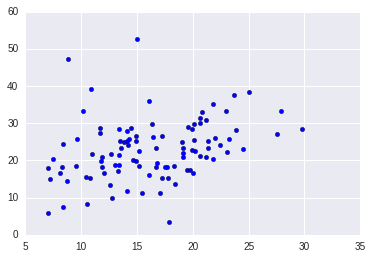

In [93]:
plt.scatter(test_targets, test_pred.flatten())
plt.show()

## Boston Housing data setについて
ボストンの家の価格データをsklearnを使って解析した例を見つけたので、それに沿って線形解析とNuralnetの結果を比較してみます。

- http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/


In [32]:
import pandas as pd
import seaborn


In [68]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [69]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [70]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [71]:
boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [72]:
bos['PRICE'] = boston.target

In [73]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [74]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

In [75]:
lm = LinearRegression()

In [76]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
print 'Estimated intercept coefficient: ', lm.intercept_

Estimated intercept coefficient:  36.4911032804


In [78]:
print 'Number of coefficients:', len(lm.coef_)

Number of coefficients: 13


In [79]:
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estiatedCoefficients'])

,features,estiatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


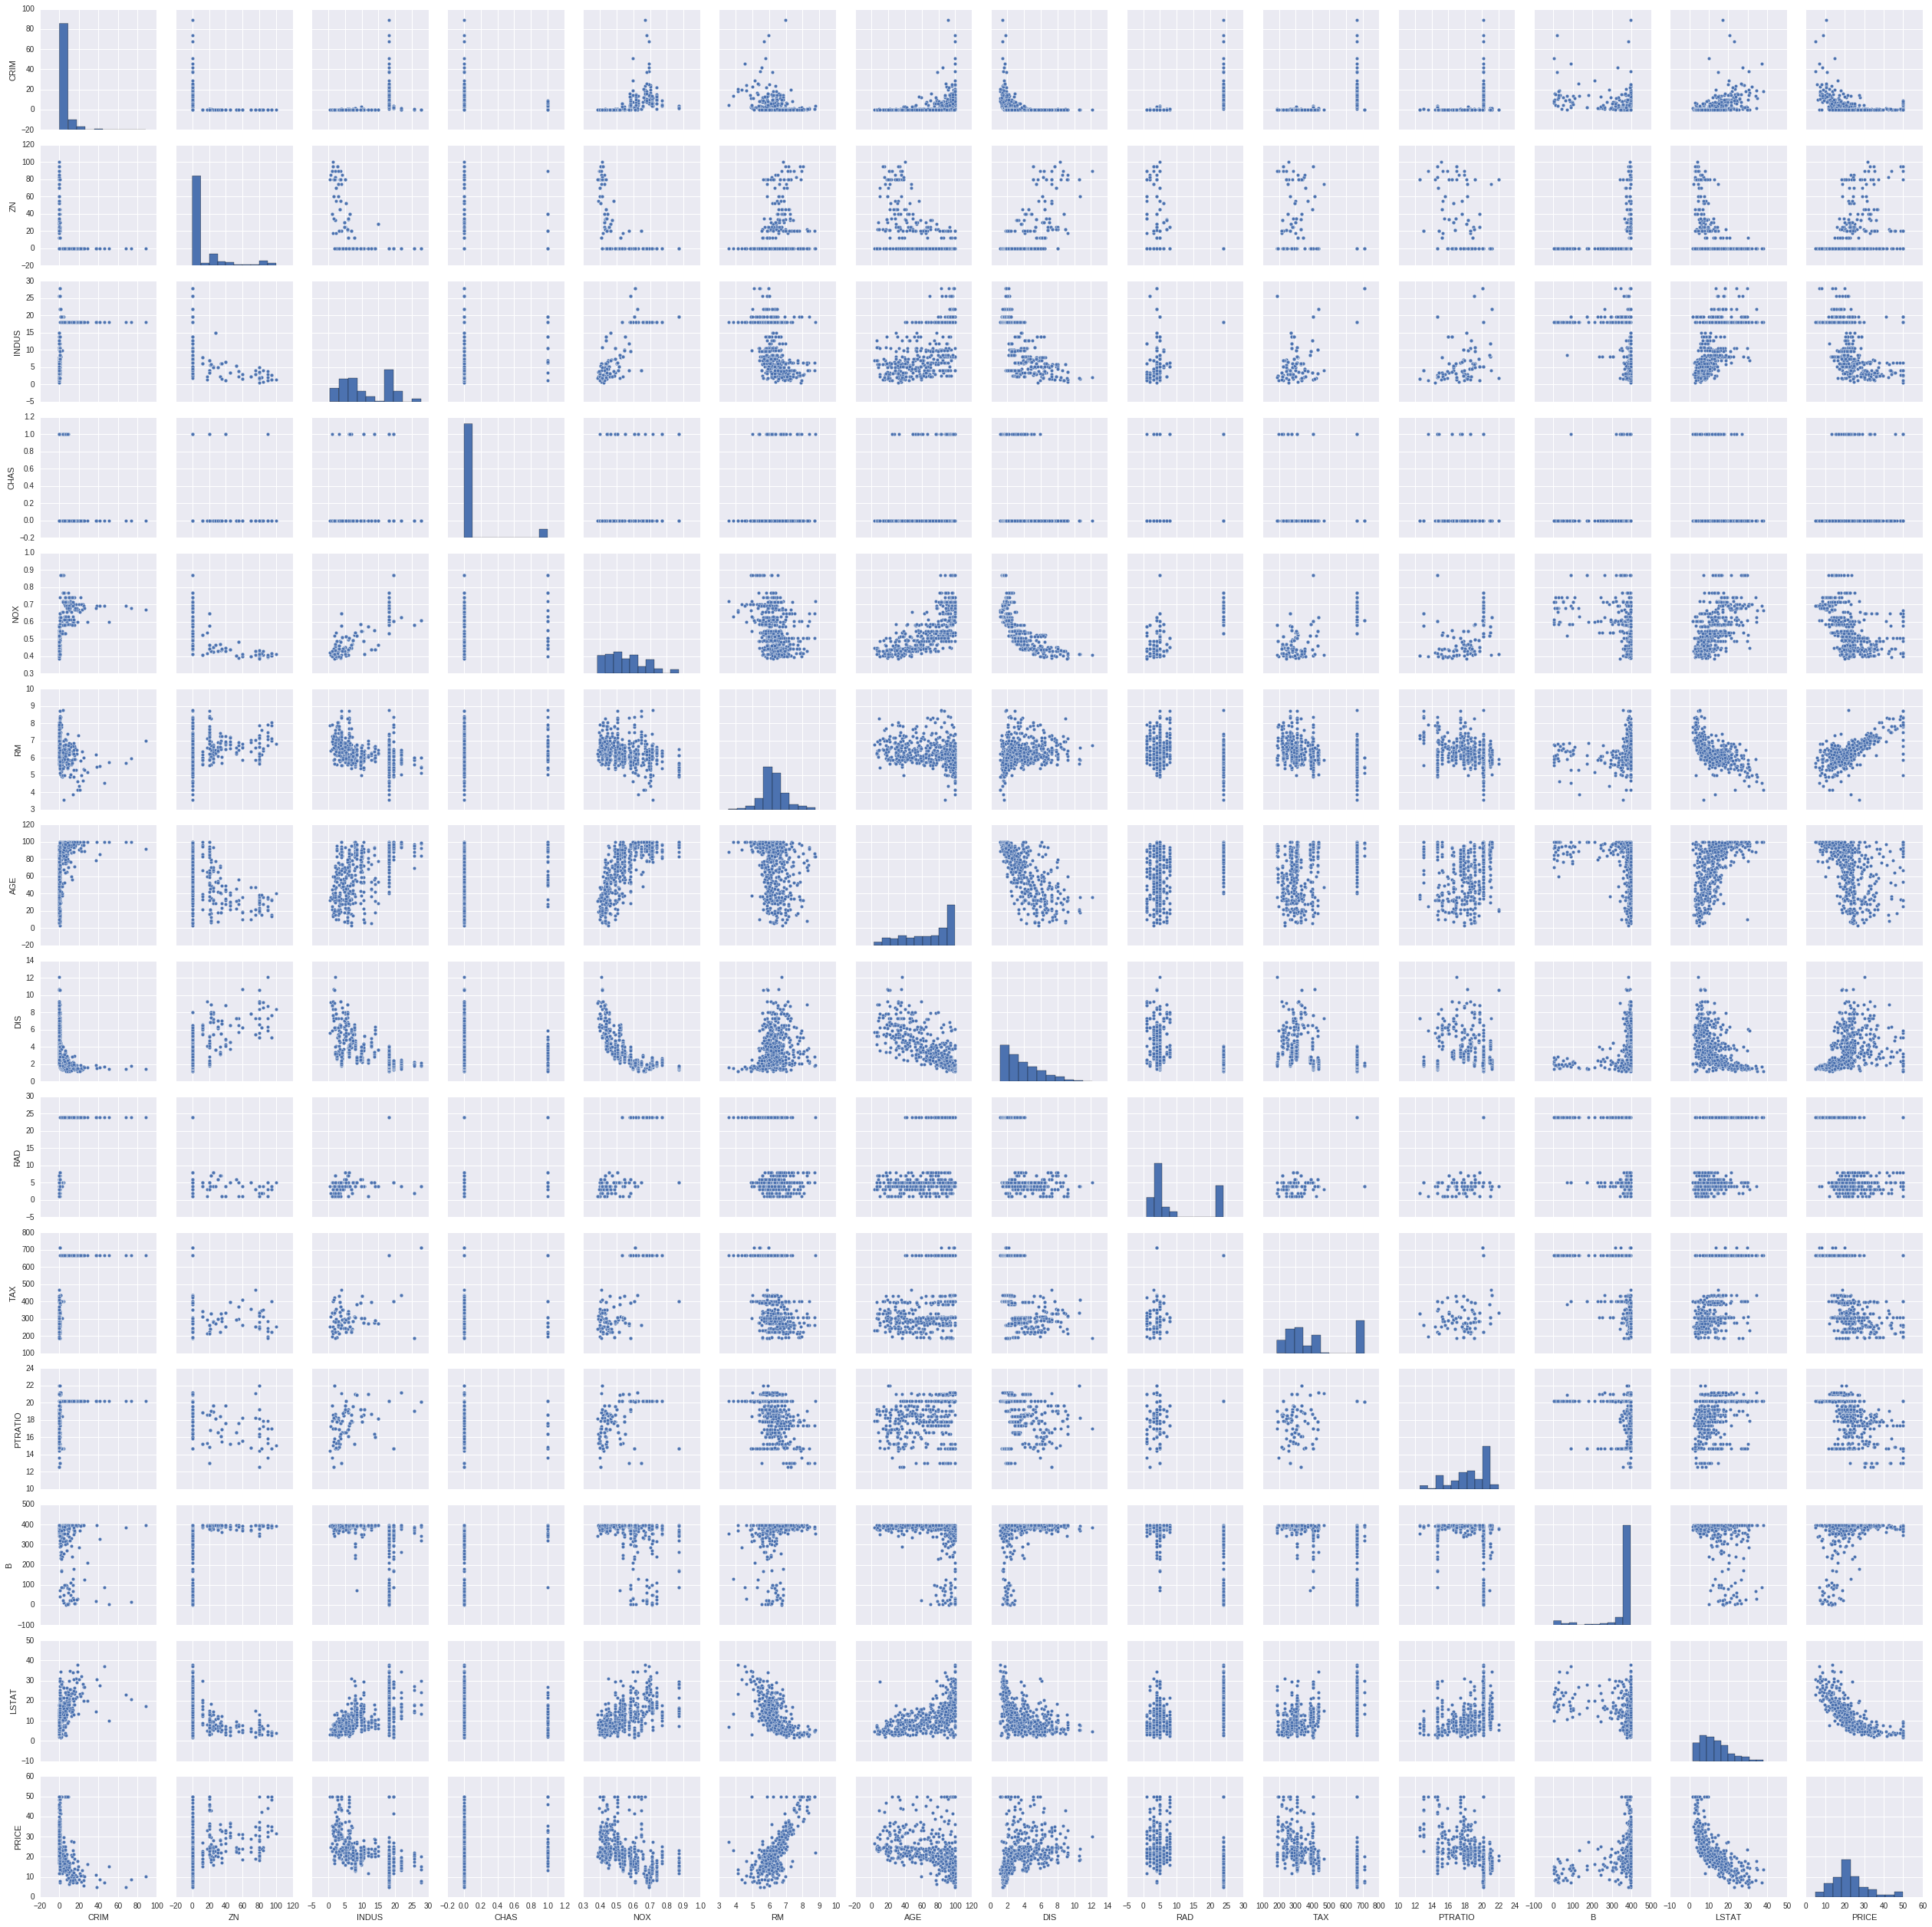

In [97]:
seaborn.pairplot(bos)
plt.show()

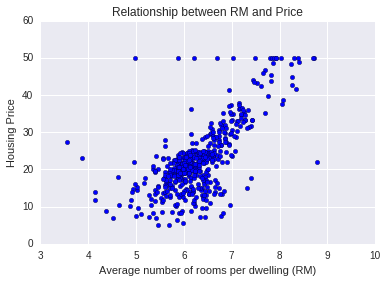

In [80]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and Price')
plt.show()

In [81]:
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

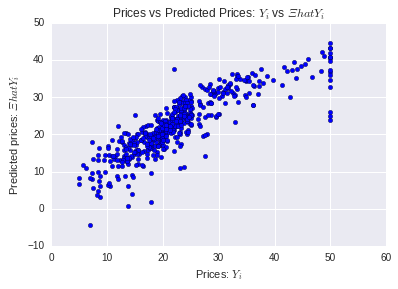

In [82]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $¥hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $¥hat{Y}_i$")
plt.show()

In [85]:
mseFull = np.mean((bos.PRICE - lm.predict(X))**2)
print mseFull

21.8977792177
